Author: Lee Clemmer

#Project 2 - Analyzing the NYC Subway Dataset

This project is part of the Udacity Data Analyst Nanodegree.

_[Project Specifications](https://docs.google.com/document/d/16T3kirC0IxvtfxlZb7n5kOz5xFF_JTwrG31J2OZj8KM/pub?embedded=True)_


## Questions
### Statistical Test
#### Selection, P value, Hypotheses
_Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?_

In analyzing whether or not rain had a significant effect on ridership, I used the Mann-Whitney U-test statistical test. One of the assumptions underlying Welch's t-test is that the data are normally distributed, which the ridership data are not. 

I used two-tailed test because I was not making any assumptions in regards to the directionality of the effect; in other words, whether ridership would be more or less on rainy days, just that it would be different. 

The null hypothesis in this case is that the probability of drawing a turnstile entry is the same for rainy and non-rainy days. The p-critical value I used was $\alpha < 0.05$. 

$H_0$: $P(x_{rainy} > y_{non-rainy}) = 0.5$

$H_A$: $P(x_{rainy} > y_{non-rainy}) \neq 0.5$

#### Applicability
_Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples._

One of the assumptions that the Welch's t-test makes is that the data are normally distributed. Because the data were extremely positively skewed, I chose to use the nonparametric Mann-Whitney U-test to determine whether there was a difference in means.

#### Results
_What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test._

Because I used a two-tailed hypothesis, I doubled the p-value returned by the $\mathtt{scipy.stats.mannwhitneyu}$ function as it is one-tailed by default. The resultant p value was 0.0499998, just under the alpha value. Therefore, we reject the null hypothesis. The means were as follows:

* Mean with rain: $\bar{x}_{rainy} = 1105.45$
* Mean without rain: $\bar{x}_{non-rainy} = 1090.28$

#### Significance
_What is the significance and interpretation of these results?_

We can say we have significant statistical evidence that ridership is slightly higher on rainy days as opposed to non-rainy days.

### Linear Regression

#### Approach
_What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:_

* _OLS using Statsmodels or Scikit Learn_

* _Gradient descent using Scikit Learn_

* _Or something different?_

I applied the Ordinarly Least Squares approach via the statsmodels python package.



#### Features
_What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?_

For the OLS regression, in addition the UNIT dummy variables, I used the following features:

* $\mathtt{const}$
* $\mathtt{hour}$
* $\mathtt{day\_week}$
* $\mathtt{meantempi}$
* $\mathtt{cond\_Clear}$
* $\mathtt{cond\_Haze}$
* $\mathtt{cond\_Light Drizzle}$
* $\mathtt{cond\_Light Rain}$
* $\mathtt{cond\_Rain}$
* $\mathtt{cond\_Scattered Clouds}$

#### Feature Selection
_Why did you select these features in your model? We are looking for specific reasons that lead you to believe that the selected features will contribute to the predictive power of your model._

* _Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.”_

* _Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my $R^2$ value.” _

I analyzed the features in stages. I began with the numerical features, and dropped any features with strong correlation. Next, I ran the model, dropped features with a p-value of over 0.05, re-ran the model, dropped high p-level features, and so on. I repeated this whole process again for the $\mathtt{condition}$ dummy variables as well as the $\mathtt{unit}$ dummy variables.

#### Parameters
_What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?_

* $\mathtt{constant}$: 2301.5215
* $\mathtt{hour}$: 122.5054
* $\mathtt{day\_week}$: -148.2291
* $\mathtt{meantempi}$: -24.6666

#### Coefficients of Determination
_What is your model’s $R^2$ (coefficients of determination) value?_

0.475

#### Fit
_What does this $R^2$ value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this $R^2$  value?_

The $R^2$ means I am explaining 47.5% of the linear variation of 465 subway turnstile entries over the span of 30 days in May 2011. Given this particular dataset and the constraint of a linear model, I do think this particular model is appropriate, striking a deliberate balance in the bias-variance tradeoff.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
%matplotlib inline
from pylab import *
from ggplot import *

In [2]:
def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    """
    # Add constant to features
    features = sm.add_constant(features)
    
    # Create model
    model = sm.OLS(values, features)
    results = model.fit()
    
    # Get parameters of regression equation
    intercept = results.params[0]
    params = results.params[1:]
    
    #print results.summary()
    
    return intercept, params

def predictions(dataframe):
    '''
    Dataframe is turnstile data with weather. I've used the improved dataset for my regression, available here:
    https://www.dropbox.com/s/1lpoeh2w6px4diu/improved-dataset.zip?dl=0
    '''
    # Numerical features
    features = dataframe[['hour','day_week','meantempi']]
    
    # Dummy variables    
    unit_dummies = pd.get_dummies(dataframe['UNIT'], prefix='unit')
    conds_dummies = pd.get_dummies(dataframe['conds'], prefix='cond')
    
    features = features.join(conds_dummies)
    features = features.join(unit_dummies)
    
    # Dropping features
    features.drop(['cond_Overcast','cond_Fog','cond_Mist','cond_Heavy Rain','cond_Partly Cloudy','cond_Mostly Cloudy'],axis=1,inplace=True)
    features.drop(['unit_R319','unit_R196','unit_R104','unit_R056','unit_R249','unit_R273','unit_R082','unit_R276','unit_R310','unit_R204','unit_R189','unit_R054','unit_R181','unit_R098','unit_R203','unit_R322','unit_R291','unit_R453','unit_R094','unit_R070','unit_R112','unit_R126','unit_R212','unit_R257','unit_R244','unit_R172','unit_R261','unit_R123','unit_R119','unit_R236','unit_R215','unit_R120','unit_R282','unit_R205','unit_R207','unit_R194','unit_R258','unit_R092','unit_R218','unit_R221','unit_R121','unit_R093','unit_R243','unit_R220','unit_R103'],axis=1,inplace=True)
    
    # Values
    values = dataframe['ENTRIESn_hourly']

    # Perform linear regression
    intercept, params = linear_regression(features, values)
    
    predictions = intercept + np.dot(features, params)
    return predictions

def compute_r_squared(data, predictions):
    '''
    Returns r^2 value for observations and predictions
    '''
    r_squared = 1 - np.sum(np.square(data - predictions))/np.sum(np.square(data - np.mean(data)))
    
    return r_squared

weather_df = pd.read_csv('turnstile_weather_v2.csv')
print "r^2 = %.3f" % (compute_r_squared(weather_df['ENTRIESn_hourly'], predictions(weather_df)))

r^2 = 0.475


#### Residual Analysis

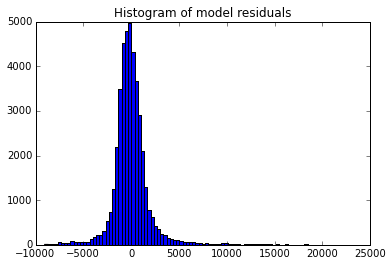

In [3]:
n, bins, patches = plt.hist([weather_df['ENTRIESn_hourly']-predictions(weather_df)],bins=100)
plt.title('Histogram of model residuals')

We see from the histogram of residuals that the residuals are both normal and centered around mean 0, as we would expect from well-behaved linear regression model.

###Visualization

_Please include two visualizations that show the relationships between two or more variables in the NYC subway data._

_Remember to add appropriate titles and axes labels to your plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure._

#### Histograms

_One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days._

* _You can combine the two histograms in a single plot or you can use two separate plots._ 

* _If you decide to use to two separate plots for the two histograms, please ensure that the x-axis limits for both of the plots are identical. It is much easier to compare the two in that case._

* _For the histograms, you should have intervals representing the volume of ridership (value of ENTRIESn_hourly) on the x-axis and the frequency of occurrence on the y-axis. For example, each interval (along the x-axis), the height of the bar for this interval will represent the number of records (rows in our data) that have ENTRIESn_hourly that falls in this interval._

* _Remember to increase the number of bins in the histogram (by having larger number of bars). The default bin width is not sufficient to capture the variability in the two samples._

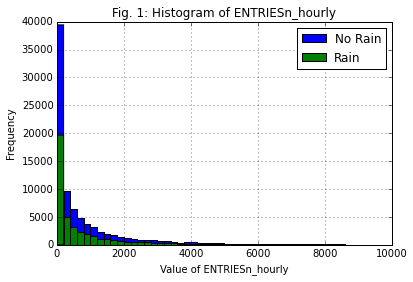

In [4]:
df = pd.read_csv('turnstile_data_master_with_weather.csv')
plt.figure()
plt.ylabel('Frequency')
plt.xlabel('Value of ENTRIESn_hourly')
plt.title('Fig. 1: Histogram of ENTRIESn_hourly')
hist_norain = df[(df.rain == 0) & (df.ENTRIESn_hourly < 10000)]['ENTRIESn_hourly'].hist(bins=50,label="No Rain")
hist_rain = df[(df.rain == 1) & (df.ENTRIESn_hourly < 10000)]['ENTRIESn_hourly'].hist(bins=50, label="Rain")
plt.legend()

_Figure 1_ is a histogram of hourly entries for both rainy and non-rainy days. Both distributions are extremely positively skewed. The x-axis is capped at 10000 to filter out outliers for sake of clarity.

#### Additional Visualization

_One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like. Some suggestions are:_

* _Ridership by time-of-day_
* _Ridership by day-of-week_

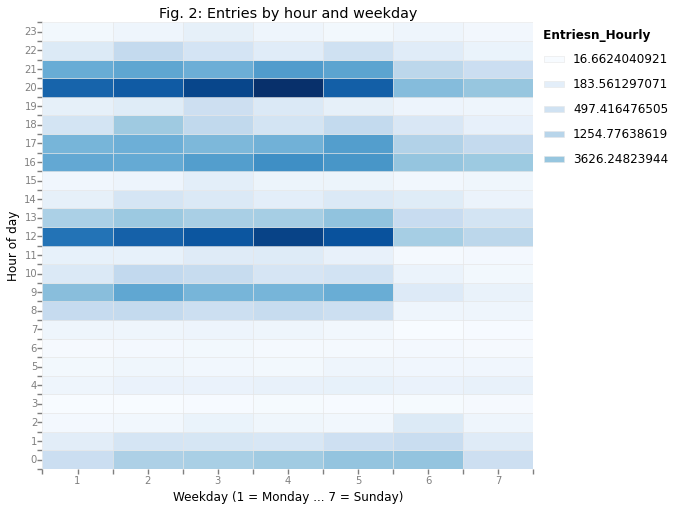

<ggplot: (278381453)>


In [6]:
pd.options.mode.chained_assignment = None

# Add week day numbers to data
df['Datetime'] = pd.to_datetime(df['DATEn'])
df['Weekday'] = df['Datetime'].apply(lambda x: x.isoweekday())

# Group by Weekday and Hour
group = df[['Weekday','Hour','ENTRIESn_hourly']].groupby(['Weekday','Hour']).mean()
group.reset_index(inplace=True)

# Plot
plot = ggplot(group, aes('Weekday','Hour',fill='ENTRIESn_hourly')) + \
       geom_tile() + ggtitle("Fig. 2: Entries by hour and weekday") + \
       xlab("Weekday (1 = Monday ... 7 = Sunday)") + ylab("Hour of day")
        
print plot

_Figure 2_ is a heatmap of the average _ENTRIESn_hourly_ by weekday and hour of the day. We discover that the busiest times of the week are on Thursday at noon and 8pm. Highest ridership times for all days are around 9am, noon, 4 to 5pm, and again at 8-9 pm. Ridership appears lowest, regardless of weekday, during 3am. Saturday and Sunday are noticeably less busy than work days. The busiest days for the midnight hour are Friday and Saturday, possibly explained by people going out for evening entertainment.

###Conclusion

_Please address the following questions in detail. Your answers should be 1-2 paragraphs long._

* _From your analysis and interpretation of the data, do more people ride
the NYC subway when it is raining or when it is not raining?_

During the month of May in 2011, NYC ridership was statistically significantly higher on rainy days than non-rainy days. The observed effect was small, a mere ~15 turnstile entries on average (~1105 turnstile entries on average on rainy days as opposed to ~1090). Possible reasons for this effect could be fewer people walking or riding their bikes in rainy weather, and therefore deciding to take the subway. Although there was a statistically significant effect on ridership by the presence of rain, this feature did not substantially contribute to better predictive outcomes using linear regression, and was ultimately not included in the model.

* _What analyses lead you to this conclusion? You should use results from both your statistical
tests and your linear regression to support your analysis._

Due the extreme positive skew of the ridership data, the Mann-Whitney U-test was employed. This non-parametric test revealed a difference in mean ridership significant at just a hair under $\alpha < 0.05$. When this feature was included in the linear regression model, it did not reveal a statistically significant coefficient (p-value < 0.05), and was therefore not included in the final model. However, three rain-related condition dummy variables did exhibit significant coefficients, so it seems plausible to conclude that inclimate weather does indeed effect to ridership.


###Reflection

_Please address the following questions in detail. Your answers should be 1-2 paragraphs long._

* _Please discuss potential shortcomings of the methods of your analysis, including:_
    * _Dataset_
    * _Analysis, such as the linear regression model or statistical test._

One of the factors that will necessarily limit the usefulness of the analysis and predictive power of any derived model is the fact that the dataset covered a single month of a single year. It's far from clear whether the model would have any usefulness in predicting subway ridership in, say, January; one might expect there to be strong seasonal patterns in ridership. It might not even be useful in predicting the month of May in later years for that matter. Perhaps ridership patterns change from year to year. In other words, the small scope of the dataset will necessarily limit the extent to which we can draw conclusions or make predictions beyond it. 

There are also possible shortcomings in the fact that we used linear regression to predict ridership. One or more variables may not have linear relationships. For example, in the model I created, $\mathtt{day\_week}$ has a coefficient of about -148; in other words, for each additional day, there are 148 fewer turnstile entries. This is because Monday is 1 and Sunday is 7, and weekends have much lower ridership levels than weekdays. However, weekdays all have roughly the same ridership levels, as do weekends (albeit much lower). The relationship between day of week and ridership is therefore not linear, yet we have modelled it as such. Other modelling techniques might better capture the true relationship between features and ridership.


## References

* [statsmodels.regression.linear_model.OLS Documentation](http://statsmodels.sourceforge.net/0.5.0/generated/statsmodels.regression.linear_model.OLS.html)

* [sklearn.linear_model.SGDRegressor Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

* [Linear Regression Example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

* [Udacity discussion: Linear Regression](https://discussions.udacity.com/t/problem-set-3-5-linear-regression/33490)

* [Udacity discussion: Feature Selection: why not use all?](https://discussions.udacity.com/t/problem-set-3-5-feature-selection-why-not-use-all/35251)

* [Wikipedia: Bias–variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

* [Wikipedia: Dummy variable (statistics)][1]

* [Wikipedia: Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity)

* [Are the model residuals well-behaved?](http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm)

* [Endogenous variable](http://www-personal.umd.umich.edu/~delittle/Encyclopedia%20entries/Endogenous%20variable.htm)

* [scipy.stats.linregress Documenation](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html)

* [matplotlib: PyPlot Tutorial](http://matplotlib.org/users/pyplot_tutorial.html)

* [Python Datetime Documentation](https://docs.python.org/2/library/datetime.html)

* [ggplot Documenation](http://ggplot.yhathq.com/)

* [ggplot2: Quick Heatmap Plotting](https://learnr.wordpress.com/2010/01/26/ggplot2-quick-heatmap-plotting/)

[1]: https://en.wikipedia.org/wiki/Dummy_variable_(statistics)
